# About

This notebook was prototyping for replicating the feature extraction methods for Delgado et al. 2017. The finished implementation is in features.py.

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [9]:
import os
data = "../data/all/"

In [10]:
import glob
files = [f for f in glob.glob(data + "**/*.jpg", recursive=True)]
files

['../data/all/test/estrus/C39_7_27_image2.jpg',
 '../data/all/test/estrus/C8_7_26_image2.jpg',
 '../data/all/test/estrus/C45_8_3_image1.jpg',
 '../data/all/test/estrus/C17_7_27_image2.jpg',
 '../data/all/test/estrus/C28_7_30_image1.jpg',
 '../data/all/test/estrus/C5_7_27_image2.jpg',
 '../data/all/test/estrus/C31_7_25_image1_REDO.jpg',
 '../data/all/test/estrus/C17_7_26_image2.jpg',
 '../data/all/test/estrus/C43_7_25_image1.jpg',
 '../data/all/test/estrus/C28_7_25_image2.jpg',
 '../data/all/test/estrus/C9_8_1_image2.jpg',
 '../data/all/test/estrus/C44_7_26_image1.jpg',
 '../data/all/test/estrus/C20_7_27_image2.jpg',
 '../data/all/test/estrus/C48_7_25_image1.jpg',
 '../data/all/test/estrus/C9_8_9_image1.jpg',
 '../data/all/test/estrus/C42_7_29_image1.jpg',
 '../data/all/test/estrus/C45_8_8_image1.jpg',
 '../data/all/test/estrus/C14_8_3_image2.jpg',
 '../data/all/test/estrus/C44_8_9_image2.jpg',
 '../data/all/test/estrus/C21_7_25_image2_10x.jpg',
 '../data/all/test/estrus/C48_7_31_image1

In [11]:
import skimage
from skimage import io
import numpy as np

(33, 255)

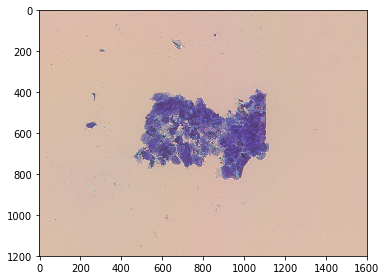

In [156]:
from random import randint
name = files[randint(0, len(files))]
name = "/home/andrew/Development/Estrous-AI/data/all/train/metestrus/C12_7_31_image1.jpg"
img1 = io.imread(name)
img1.min(), img1.max()
io.imshow(img1)

# Testing Delgado et al. Convert to Gray colorspace and Otsu thresholding

(0.2463921568627451, 0.955047843137255)

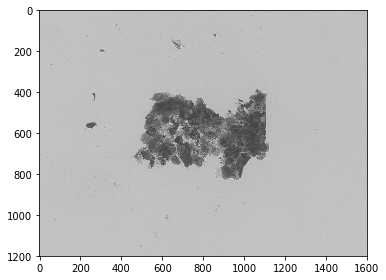

In [13]:
grayed = skimage.color.rgb2gray(img1)
grayed.min(), grayed.max()
io.imshow(grayed)

In [14]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(grayed)
thresh

0.5661176715686276

(False, True)

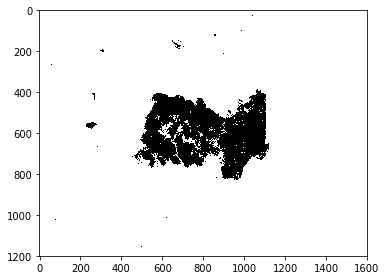

In [15]:
binary = grayed > thresh
binary.min(), binary.max()
io.imshow(binary)

In [19]:
grayed

array([[0.75659216, 0.75267059, 0.75183725, ..., 0.7471051 , 0.7471051 ,
        0.75019333],
       [0.76051373, 0.76051373, 0.75575882, ..., 0.7471051 , 0.7471051 ,
        0.75102667],
       [0.75659216, 0.75659216, 0.75183725, ..., 0.74905451, 0.74905451,
        0.75102667],
       ...,
       [0.75773882, 0.76249373, 0.76249373, ..., 0.75857216, 0.75465059,
        0.75465059],
       [0.76363255, 0.75773882, 0.75773882, ..., 0.75857216, 0.75465059,
        0.75465059],
       [0.76363255, 0.75971098, 0.75381725, ..., 0.75857216, 0.75381725,
        0.75381725]])

In [20]:
grayed.min(), grayed.max()

(0.2463921568627451, 0.955047843137255)

In [21]:
grayed.dtype

dtype('float64')

## Test the Median filter they also mentioned before thresholding

/home/andrew/.miniconda3/envs/pt/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(66, 195)

(1200, 1600)

dtype('uint8')

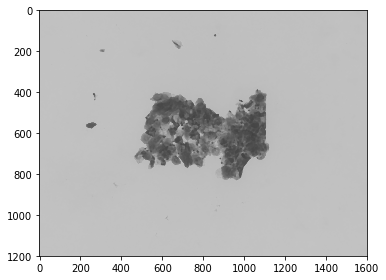

In [22]:
grayed_median_filter = skimage.filters.median(grayed, np.ones((8,8)))
grayed_median_filter.min(), grayed_median_filter.max()
grayed_median_filter.shape
grayed_median_filter.dtype
io.imshow(grayed_median_filter)

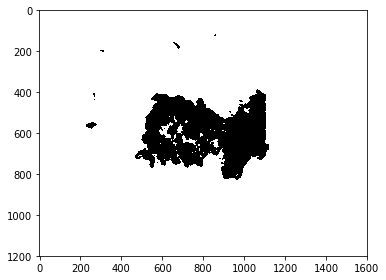

In [23]:
thresh_median = threshold_otsu(grayed_median_filter)
binary_median = grayed_median_filter > thresh_median
io.imshow(binary_median)


Perform a masking using otsu

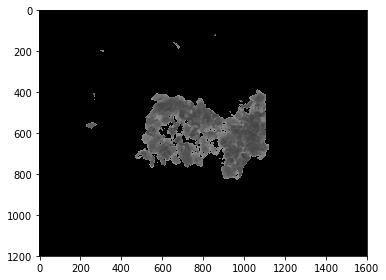

In [24]:
grayed_median_filter[binary_median] = 0
io.imshow(grayed_median_filter)

As we can see from above, median filter does indeed remove noise.

**Delgado et al. used a 5,5 window, but we may want to increase to 8,8 because I observe a larger window reduces the noise better for our dataset**

A median filter might even be good for our own CNN methods! Our dataset really is noisy

# CIELAB Testing

In [25]:
labbed = skimage.color.rgb2lab(img1)
labbed.min(), labbed.max()

(-72.64499400614379, 96.14765984948734)

In [26]:
alpha = labbed[:,:,1]
beta = labbed[:,:,2]

/home/andrew/.miniconda3/envs/pt/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


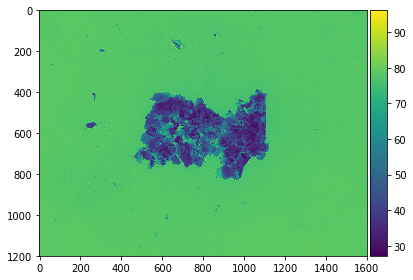

In [27]:
io.imshow(labbed[:,:,0])

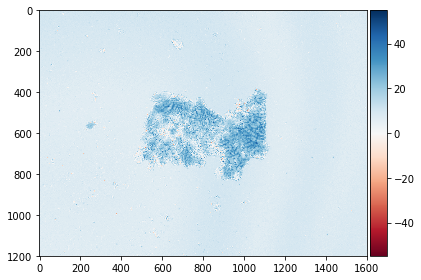

In [28]:
io.imshow(alpha)

In [29]:
threshold_otsu(alpha)

15.299111741999614

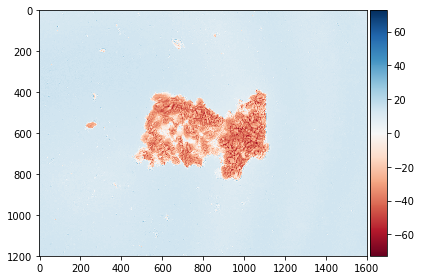

In [30]:
io.imshow(beta)

In [31]:
converted = (alpha + 127).astype("uint8")
converted.min(), converted.max()

(92, 181)

In [32]:
beta.dtype

dtype('float64')

# GLCM Testing

In [33]:
import scipy
binary_median.min(), binary_median.max()

(False, True)

In [34]:
grayed_median_filter.min(), grayed_median_filter.max(), 

(0, 145)

In [35]:
from skimage.feature import greycomatrix, greycoprops
from math import radians as rad
glcm = greycomatrix(grayed_median_filter, (1, 5), (0, rad(45), rad(90), rad(135)), normed=True)
glcm.shape

(256, 256, 2, 4)

In [36]:
greycoprops(glcm, "contrast")

greycoprops(glcm, "dissimilarity")

greycoprops(glcm, "homogeneity")

greycoprops(glcm, "energy")

array([[ 37.62667813,  50.60847246,  36.76094141,  51.66102459],
       [148.77755172, 160.16984979, 147.28933682, 162.95281263]])

array([[0.43641547, 0.58710798, 0.42566931, 0.59540758],
       [1.75262382, 1.88797873, 1.72605544, 1.91051521]])

array([[0.95466915, 0.94703792, 0.95497257, 0.94760773],
       [0.92104695, 0.91898772, 0.92126279, 0.91938857]])

array([[0.90982373, 0.90939937, 0.90983634, 0.90937208],
       [0.90615527, 0.90558272, 0.90622555, 0.90546075]])

In [37]:
np.ravel(greycoprops(glcm, "contrast"))

array([ 37.62667813,  50.60847246,  36.76094141,  51.66102459,
       148.77755172, 160.16984979, 147.28933682, 162.95281263])

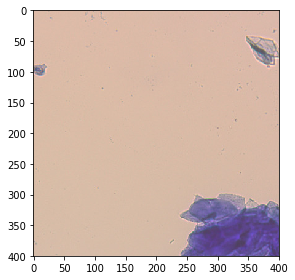

In [38]:
x = 100
y = 300
size=400
io.imshow(img1[x:x+size, y:y+size, :])

In [39]:
img1.mean()

183.88160642361112

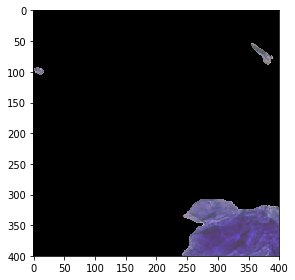

In [40]:
segmented = img1.copy()
segmented[binary_median] = 0
io.imshow(segmented)
io.imshow(segmented[x:x+size, y:y+size, :])

Make sure a value of 1 really means white, 0 means black.

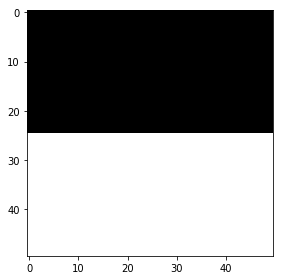

In [42]:
test = np.ones((50,50))
test[0:25] = 0
io.imshow(test)

In [ ]:
io.imshow(np.invert(binary_median))

In [ ]:
connected_labels = skimage.measure.label(np.invert(binary_median))


In [ ]:
compactness_factor = lambda rprop: rprop.area / rprop.perimeter**2 if rprop.perimeter > 0 else 0

rprops = skimage.measure.regionprops(connected_labels+1)
# total_compactness = 0

total_compactness = 0
for r in rprops:
    fc_i = compactness_factor(r)
    total_compactness += fc_i

In [ ]:
total_compactness

In [ ]:
average_compactness = total_compactness / len(rprops)
average_compactness

Conclusion, black is 0, white is 1.

In [ ]:
segmented.mean()

In [ ]:
io.imshow(grayed)

In [ ]:
io.imshow(labbed[:,:,0], cmap="gray")

# Make a standalone segmentation function

In [43]:
import skimage


def otsu_segment(image, median_filter_blur=7, inplace=False):
    """
    Runs a median filter and otsu thresholding to segment images. Image must be single channel uint8.
    
    Returns the segmented image, as well as the mask.
    
    For the mask, 1 is areas of interest, 0 is background.
    
    """
    assert len(image.shape) == 2, "Must be a 2-D image"
    # whether to do inplace edit or not
    if not inplace:
        image = image.copy()
    # turn to grayscale
    # apply median blur
    blur = np.ones((median_filter_blur, median_filter_blur))
    denoised = skimage.filters.median(image, blur)
    # segment using otsu threshold
    thresh = skimage.filters.threshold_otsu(denoised)
    mask = denoised > thresh
    image[mask] = 0
    # invert the mask before we used it to "select" the background. but we want to return 1 at the area of interest
    return image, np.invert(mask).astype(int)
    

In [44]:
def extract_shape_factors(otsu_mask):
    """
    "Morphological metrics" from Delgado et al. 2017, bottom left column on page 3
    """
    connected_labels = skimage.measure.label(otsu_mask)
    # add +1 to connected labels, because 0 value is ignored
    rprops = skimage.measure.regionprops(connected_labels+1)
    num_elements = len(rprops)
    
    # def a function 
    compactness_factor = lambda rprop: rprop.area / rprop.perimeter**2 if rprop.perimeter > 0 else 0

    total_compactness = 0
    for r in rprops:
        fc_i = compactness_factor(r)
        total_compactness += fc_i
    
    average_compactness = total_compactness / num_elements
    
    return num_elements, average_compactness, total_compactness

In [45]:
def extract_cielab_channels(image):
    """
    Extracts gray from grayscale, alpha and beta from CIELAB. As according to Delgado et al.
    """
    
    grayed = skimage.color.rgb2gray(image)
    grayed = skimage.img_as_ubyte(grayed) # convert [0,1] to [0,255]
    labbed = skimage.color.rgb2lab(image)
    alpha = (labbed[:,:,1] + 127).astype("uint8") # to convert to gray, alpha + 127, beta + 128. https://stackoverflow.com/questions/25294141/cielab-color-range-for-scikit-image
    beta = (labbed[:,:,2] + 128).astype("uint8")
    
    return grayed, alpha, beta

In [46]:
from skimage.feature import greycomatrix, greycoprops

def extract_glcm_features(image, props=("contrast", "dissimilarity", "homogeneity", "energy")):
    grayed, alpha, beta = extract_cielab_channels(image)
    
    segmentations = []
    feature_arrs: List[np.ndarray] = []
    for channel in (grayed, alpha, beta):
        segmented, mask = otsu_segment(channel)
        segmentations.append(segmented)
        glcm = greycomatrix(segmented, (1, 5), (0, rad(45), rad(90), rad(135)), normed=True)

        for prop in props:
            feat = greycoprops(glcm, prop) 
            # feat is a 2d array: distance, angle. need to flatten
            feature_arrs.append(np.ravel(feat))
        
        morphological = extract_shape_factors(mask)
        feature_arrs.append(morphological)
            
    features = np.concatenate(feature_arrs)
    return features, segmentations
            

In [47]:
np.set_printoptions(suppress=True)
feat, seg = extract_glcm_features(img1)
feat

array([ 46.91815197,  63.21046672,  45.51586843,  64.88700663,
       175.97297492, 187.18842151, 173.32246025, 189.68862478,
         0.74959975,   0.97740821,   0.72698082,   0.9951038 ,
         2.28789864,   2.40485201,   2.24770502,   2.41886174,
         0.93154045,   0.92683721,   0.93191535,   0.92687299,
         0.91465515,   0.9135501 ,   0.91478668,   0.91363667,
         0.90969719,   0.90926664,   0.90971968,   0.9092489 ,
         0.905853  ,   0.90530283,   0.9059428 ,   0.90517348,
        18.        ,   0.06238488,   1.12292791,  67.63351678,
        92.77268111,  65.83196726,  92.9880482 , 249.61298485,
       269.87635477, 245.07624843, 272.88095605,   1.03449552,
         1.41572376,   1.02656276,   1.40507698,   2.79715935,
         2.95234009,   2.75799111,   2.97415518,   0.80960086,
         0.74658643,   0.8108597 ,   0.74708062,   0.64979407,
         0.64278608,   0.65197697,   0.64301198,   0.3101272 ,
         0.27888141,   0.31102991,   0.27907816,   0.24

In [48]:
len(feat)

105

# Test idea of croppings

In [102]:
img1.shape

(1200, 1600, 3)

In [157]:
def patch_gen(image, size=400, step=1):
    for y in range(0, image.shape[0] - size + 1, int(size * step)):
        for x in range(0, image.shape[1] - size + 1, int(size * step)):
            yield image[y:y+size, x:x+size,:]

In [158]:
gen = patch_gen(img1)

### See if we can intelligently filter out "empty" patches

[85.654, 82.255375, 73.16793125]
80.35910208333333
79.41096562499999


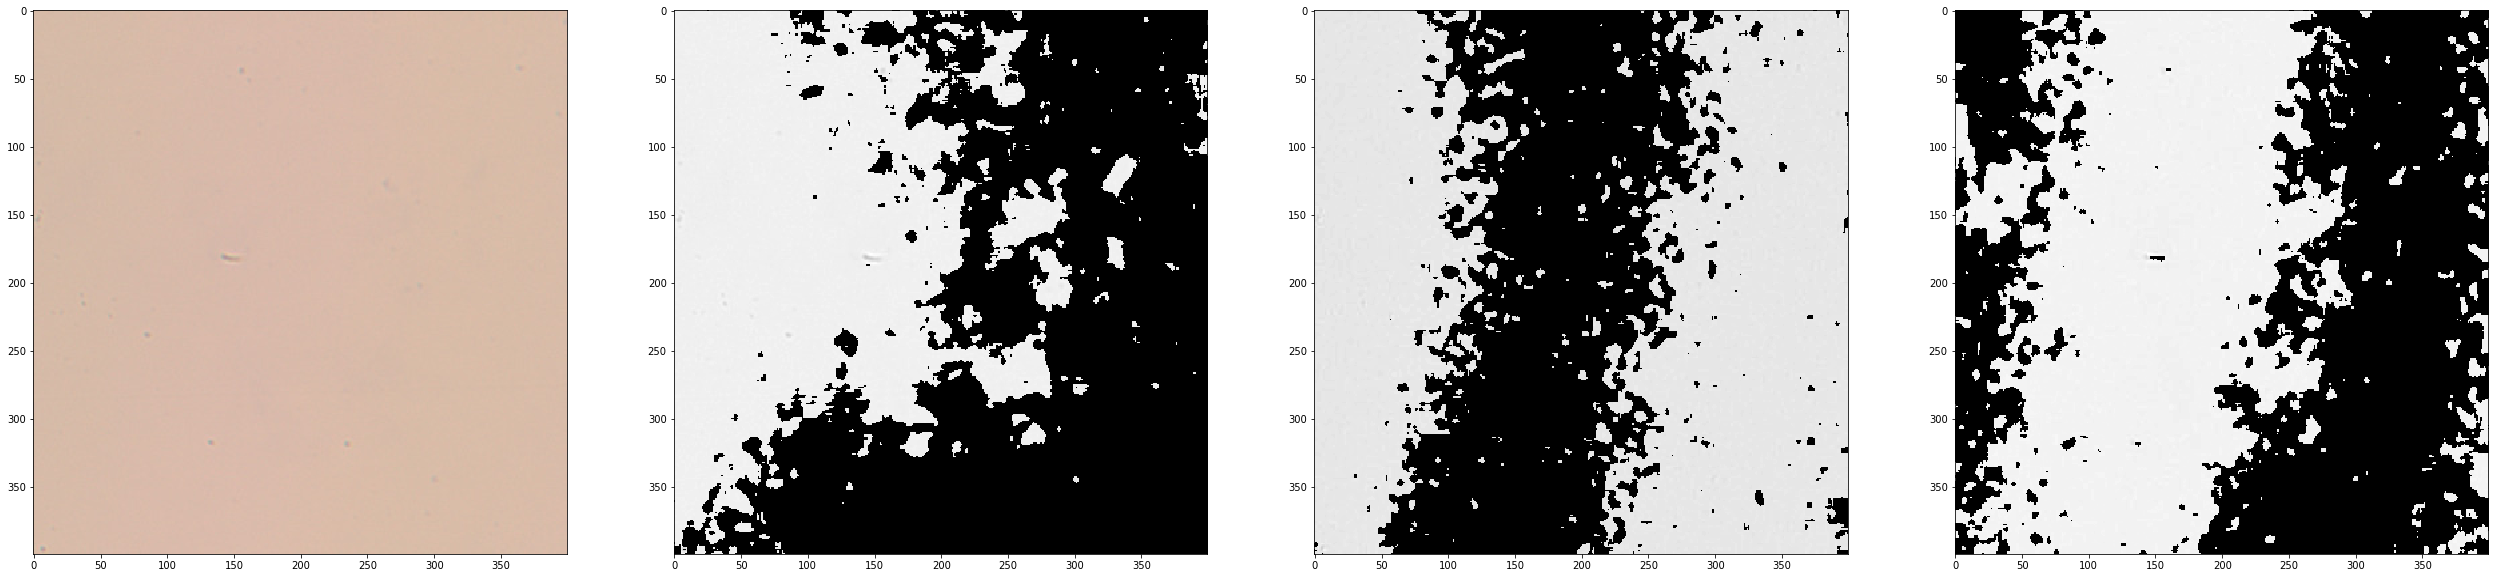

In [166]:
import matplotlib.pyplot as plt
from statistics import mean


f, ax = plt.subplots(1, 4, figsize=(44,10))

x = next(gen)
g, a, b = extract_cielab_channels(x)

imgs = [x, otsu_segment(g)[0], otsu_segment(a)[0], otsu_segment(b)[0]]

means = [m.mean() for m in imgs[1:]]
print(means)
print(mean(means))
print((means[0] + means[2]) / 2)

for i, img, in enumerate(imgs):
    ax[i].imshow(img, aspect="auto", cmap="gray")


In [123]:
extract_glcm_features(x)[0].shape

(105,)